# Введение
Сегодня на практике мы поработаем с очень интересными данными. Изучим способы работы с выбросами и пропущенными значениями.

Данные представляют собой информацию о пассажирах космического корабля "Титаник", который столкнулся с пространственно-временной аномалией. Каждый пассажир имеет набор характеристик, полученных из повреждённой компьютерной системы корабля. Эти данные включают информацию, которая может помочь определить, был ли пассажир перемещён в другое измерение в результате этого инцидента.

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


`PassengerId` - Уникальный идентификатор для каждого пассажира. Каждый идентификатор имеет форму gggg_pp, где gggg обозначает группу, с которой пассажир путешествует, а pp - его номер в группе. Люди в группе часто являются членами семьи, но не всегда.  
`HomePlanet` - планета, с которой пассажир улетел, обычно это планета его постоянного проживания.  
`CryoSleep` - указывает, решил ли пассажир погрузиться в анабиоз на время путешествия. Пассажиры, находящиеся в состоянии криосна, находятся в своих каютах.  
`Cabin` - Номер каюты, в которой находится пассажир. Имеет форму deck/num/side, где side может быть либо P для левого борта, либо S для правого.  
`Destination` - планета, на которую пассажир будет высаживаться.  
`Age` - возраст пассажира.  
`VIP` - Оплачивал ли пассажир специальные VIP-услуги во время рейса.  
`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - сумма, которую пассажир заплатил за каждый из многочисленных роскошных удобств космического корабля "Титаник".  
`Name` - имя и фамилия пассажира.  
`Transported` - был ли пассажир перевезен в другое измерение. Это цель, столбец, который вы пытаетесь предсказать.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/RShoose/Data/main/space_ship.csv')

# Первичный анализ

Рассмотрим загруженный датасет

In [5]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Посмотрим информацию о нем

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


На основании предоставленных данных можно сделать следующий анализ структуры DataFrame:

- **Размеры DataFrame**:
  - DataFrame содержит 8693 строки (RangeIndex: 0 до 8692) и 14 столбцов.
  
- **Описание столбцов**:
  - Столбцы имеют разный % заполненности, что указывает на наличие пропусков (null-значений) в некоторых колонках.
  - Типы данных разделены следующим образом:
    - **bool**: 1 (логический тип, например, True/False).
    - **float64**: 6 (числовой тип, используется для представления вещественных чисел с десятичной дробью).
    - **object**: 7 (тип строк или категорий).
    
- **Пропуски**:
  Количество ненулевых значений (Non-Null Count) меньше общего количества строк (8693) для большинства столбцов. Важно:
  - Наиболее заполняемые столбцы: `Age` и `VIP` имеют 8514 ненулевых значений.
  - Наименее заполняемый столбец: `CryoSleep` (8476 ненулевых значений).

- **Общий объём памяти**:
  Используется около 891.5 KB, что оптимально для работы на большинстве компьютеров.

### Что важно сделать дальше:
1. **Обработка пропусков**:
   - Необходимо выявить столбцы с пропусками и заполнить их или удалить строки/столбцы с учётом контекста.
   
2. **Анализ типов данных**:
   - Могут быть столбцы, у которых текущий тип данных не оптимален, например:
     - `PassengerId` используется как идентификатор, и его можно преобразовать в категориальный тип.
     
3. **Дополнительный анализ статистик**:
   - Изучить значения каждого столбца на наличие неожиданных данных или выбросов.

4. **Визуализация пропусков**:
   - Построить тепловую карту для наглядного представления отсутствующих значений.

Определим признак `Transported` как целевой признак, так как можно решить задачу классификации, будет транспортирован или нет.

# Исследовательский анализ данных

## Целевой признак

Text(0.5, 1.0, 'Распределение целевого признака')

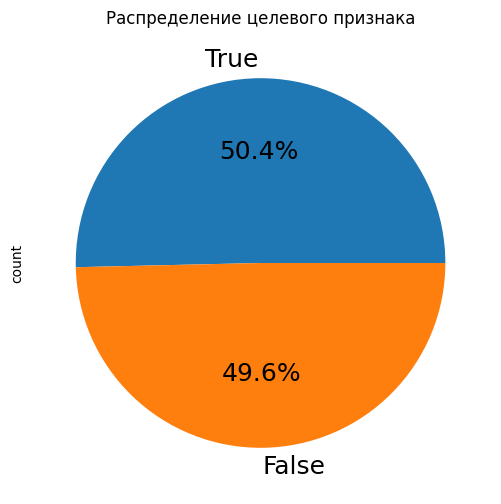

In [13]:
plt.figure(figsize=(6,6))

data['Transported'].value_counts().plot.pie(explode=[0,0],
                                            autopct='%1.1f%%', textprops={'fontsize':18}).set_title("Распределение целевого признака")

Для понимания кода:
- `data['Transported'].value_counts()` — считает количество уникальных значений в столбце `Transported`.  
Вызов метода `.plot.pie()`.
`plot.pie()` создает круговую диаграмму (`pie chart`).   
Главные параметры внутри метода:
- `explode=[0.1, 0.1]` — отклоняет сегменты круговой диаграммы от центра. Здесь указано, что каждый из двух сегментов (`True` и `False`) будет немного вынесен наружу (на 10% радиуса круга). Эффект добавляется для красоты, чтобы сегменты не "сливались".
    Пример: если бы был список `explode=[0.1, 0]`, то от центра отклонился бы только первый сегмент.
- `autopct='%1.1f%%'` — отвечает за отображение значений в процентах поверх сегментов диаграммы.
  - `%1.1f%%` означает, что числа будут отображены с одним десятичным знаком и знаком `%`.
- `shadow=True` — добавляет тень под диаграммой, создавая 3D-эффект.
- `textprops={'fontsize':16}` — изменяет шрифт текста, размещённого на самом графике (например, на метках сегментов диаграммы). Здесь шрифт становится больше (`fontsize=16`).

Мы видим, что классы у нас представлены значением True и False, объектов в обоих классах практически одинаковое количество, значит, что у нас равное количество примеров для обоих классов, на которых модель может обучиться

## Числовые признаки

In [50]:
data['Transported'][(data['Transported'] == False) & (data['Age'] == 18)].value_counts()

Transported
False    160
Name: count, dtype: int64

Text(0.5, 0, 'Age')

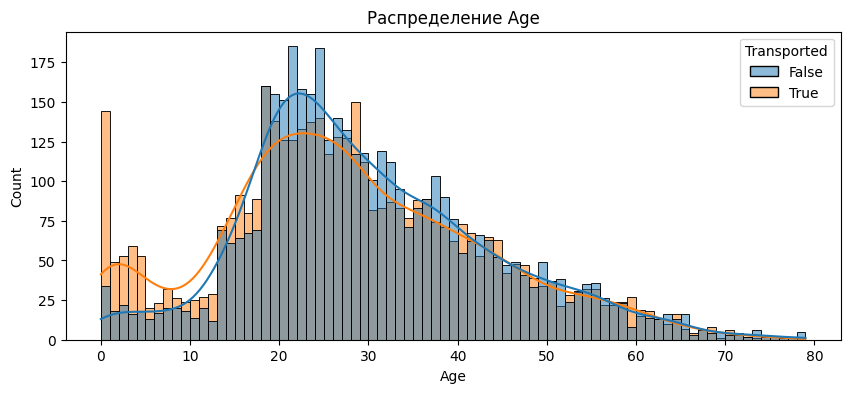

In [179]:
# Размер графика
plt.figure(figsize=(10,4))

sns.histplot(data=data, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Распределение Age')
plt.xlabel('Age')

- Для младших возрастов (около 0 лет) больше участников в группе True (транспортированы).
- Среди молодых людей (около 20–30 лет) преобладают те, кто относится к группе False (не были транспортированы).
- С возрастом общее количество людей в обоих категориях уменьшается.
- Группа False более заметно представлена в диапазоне 20–40 лет.

Возраст влияет на вероятность транспортировки, причем младшие участники чаще попадают в категорию True, а взрослые и пожилые — чаще в категорию False.


Метод `sns.histplot` для построения гистограммы.

- `data=train` — указывает на DataFrame `train`, из которого берутся данные для построения графика.
- `x='Age'` — обозначает, что ось x будет представлена значениями столбца `Age`. Это возраст пользователей.
- `hue='Transported'` — добавляет цветовую раскраску (разделение) данных на основе другого столбца, `Transported`, содержащего целевой бинарный признак.
- Например, значения `True` и `False` (или 1 и 0) в столбце `Transported` будут обозначены разными цветами, чтобы показать, как данные (`Age`) распределяются для разных групп (`Transported=True` и `Transported=False`).

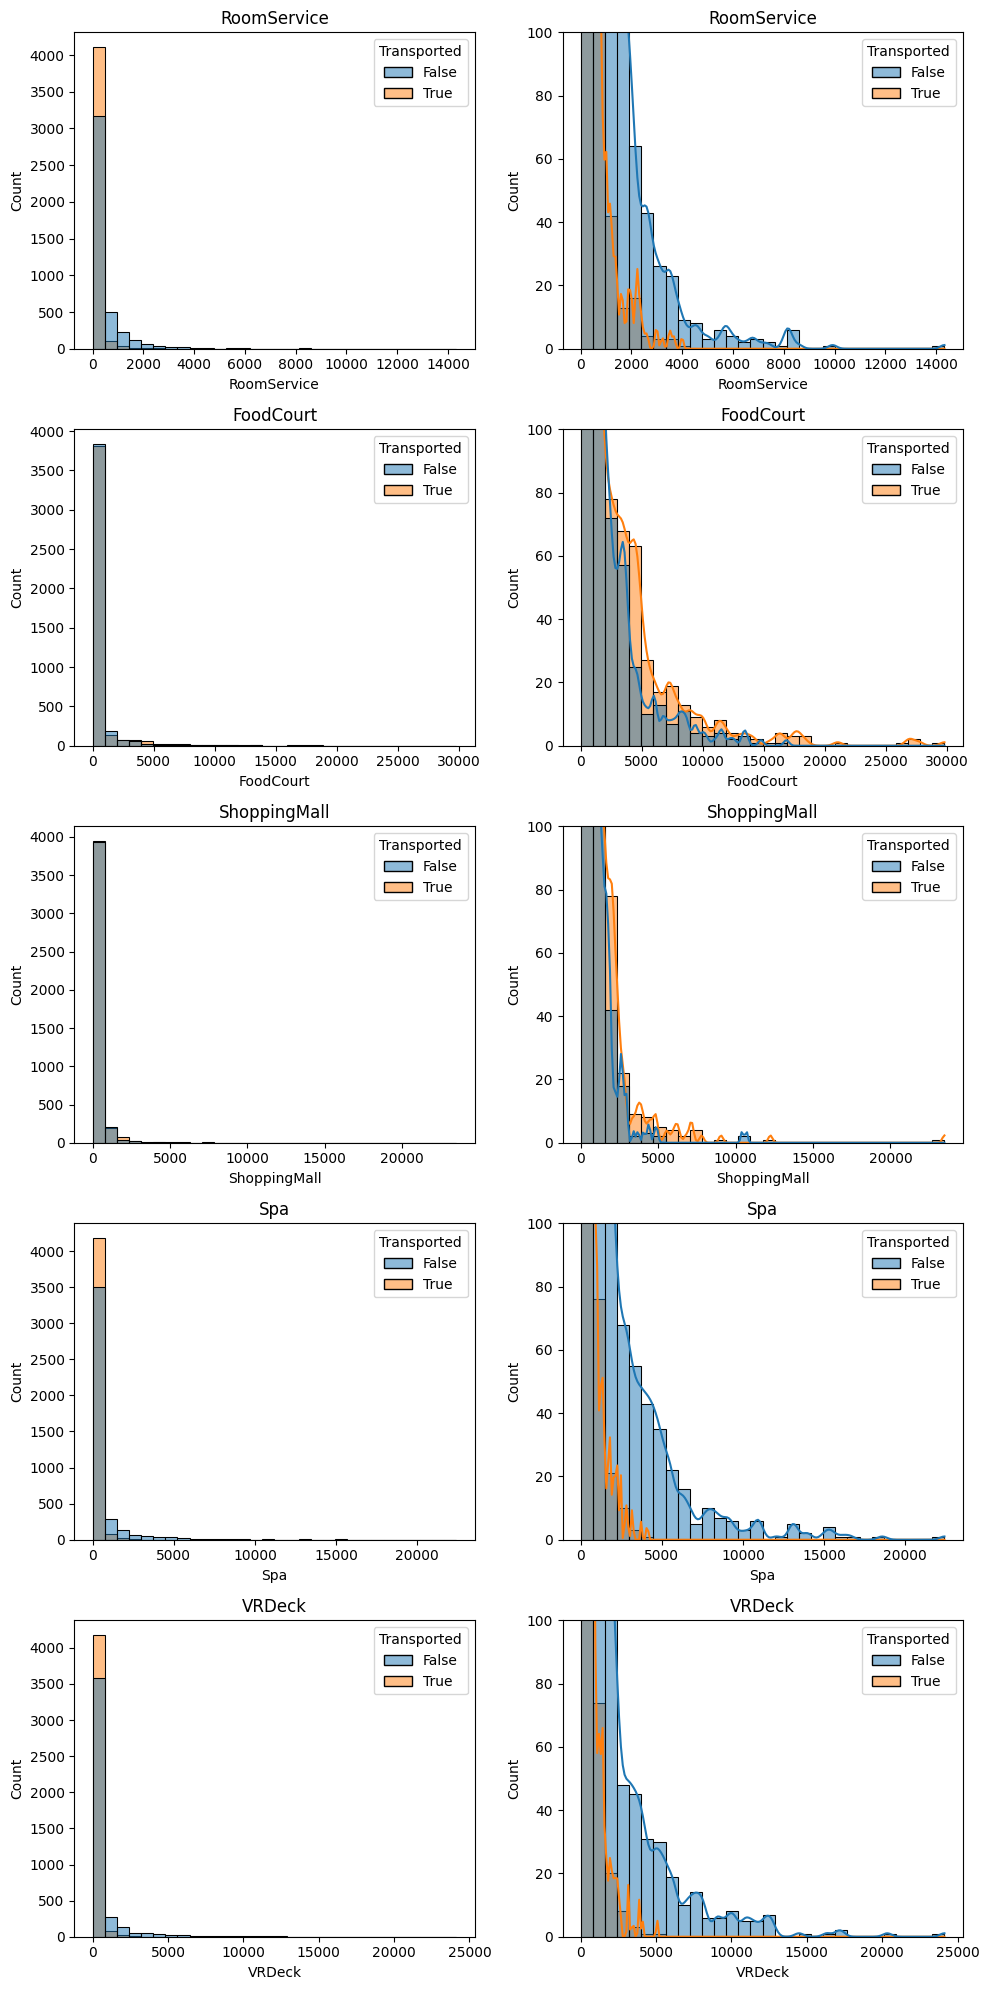

In [7]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']  # Список столбцов, связанных с расходами

# Инициализируем фигуру для графиков с заданным размером
fig=plt.figure(figsize=(10,20))

for i, var_name in enumerate(exp_feats):  # Проходимся по каждому столбцу из списка
    # Левый график: полное распределение по текущему признаку (без усечения значений)
    ax=fig.add_subplot(5,2,2*i+1)  # Добавляем левый подграфик
    sns.histplot(data=data, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')  # Гистограмма, с группировкой по Transported
    ax.set_title(var_name)  # Название текущего признака

    # Правый график: усечённое распределение (для уменьшения воздействия выбросов)
    ax=fig.add_subplot(5,2,2*i+2)  # Добавляем правый подграфик
    sns.histplot(data=data, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')  # Гистограмма с учетом плотности распределения (kde=True)
    plt.ylim([0,100])  # Ограничиваем высоту оси Y для удобства отображения
    ax.set_title(var_name)  # Название текущего признака

fig.tight_layout()  # Уменьшаем расстояние между графиками для аккуратного отображения
plt.show()  # Отображаем все графики

- Большинство людей вообще не тратят деньги (это видно по пику на нуле).  
- Распределение трат быстро убывает по экспоненте (что видно в правой части графика).  
- Есть небольшое количество людей, которые потратили значительно больше остальных (выбросы).  
- Люди, которых были транспортированы, как правило, тратили меньше.  
- Траты на **RoomService**, **Spa** и **VRDeck** отличаются от трат на **FoodCourt** и **ShoppingMall** — первые можно считать более "люксовыми" услугами, а вторые — чем-то более "повседневным".

## Категориальные признаки

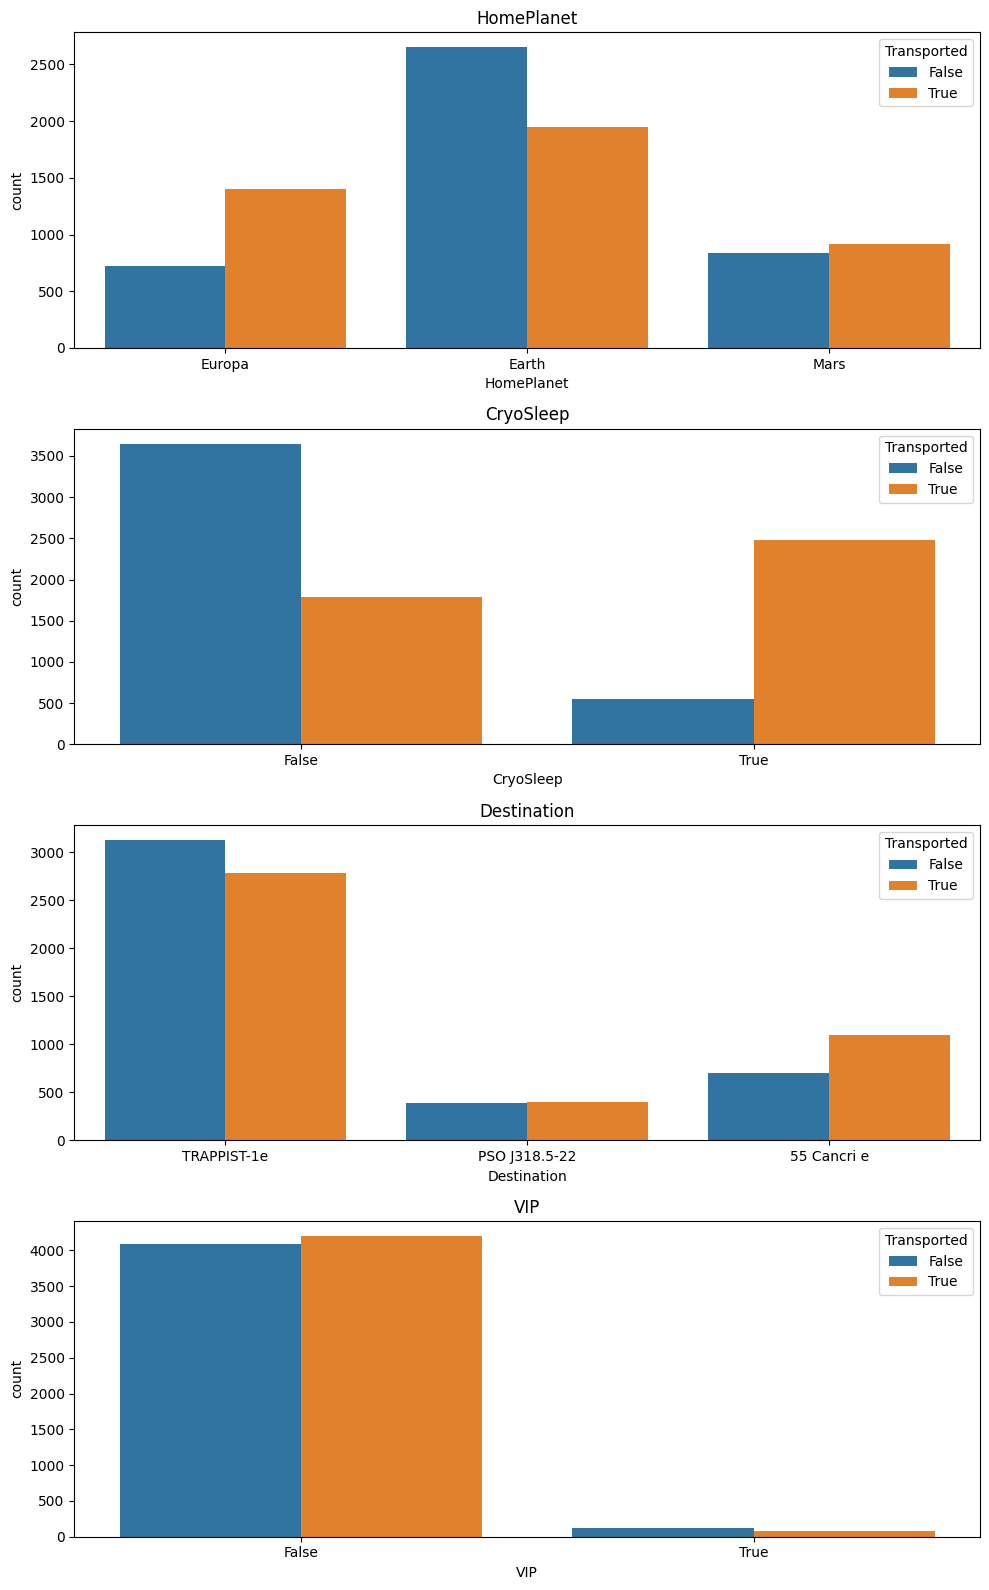

In [181]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']  # Список категориальных признаков для анализа

# Инициализируем фигуру для графиков с указанным размером
fig=plt.figure(figsize=(10,16))

# Цикл для прохода по всем категориальным признакам из списка
for i, var_name in enumerate(cat_feats):
    # Создаём подграфик для текущего категориального признака
    ax=fig.add_subplot(4,1,i+1)  # Определяем расположение графика (всего 4 строки графиков)
    sns.countplot(data=data, x=var_name, axes=ax, hue='Transported')  # Столбчатая диаграмма с разбивкой по Transported
    ax.set_title(var_name)  # Устанавливаем название графика (имя текущего признака)

# Настраиваем общий внешний вид (уменьшение расстояния между графиками)
fig.tight_layout()

# Отображаем все графики
plt.show()

VIP не является полезным признаком, так как распределение целевой переменной (`Transported`) примерно одинаковое для обоих категорий (VIP=True и VIP=False). Это значит, что данный признак слабо связан с целевой переменной и вряд ли окажет значительное влияние на качество модели.

В отличие от этого, признак CryoSleep демонстрирует явную связь с переменной `Transported`. Вероятность того, что пассажир был "транспортирован", существенно отличается в зависимости от значения CryoSleep.

Выводы:
1. Признак `VIP` можно рассмотреть для удаления из набора данных. Этот признак, скорее всего, не добавит дополнительной полезной информации.
2. Признак `CryoSleep` выглядит очень информативным и должен быть оставлен в наборе данных для обучения модели, так как может значительно улучшить её качество.

## Пропущенные значения

In [9]:
# собираем данные с пропущенными значениями
na_cols=data.columns[data.isna().any()].tolist()

# сформируем таблицу с процентным соотношением пропущенных значений
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


Визуализируем для наглядности

Text(0.5, 1.0, 'Тепловая карта пропущенных значений')

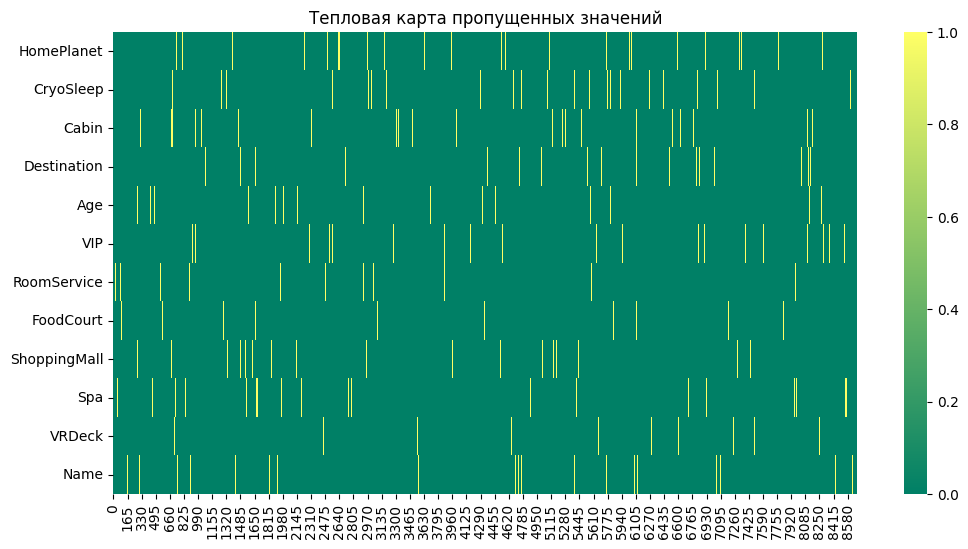

In [184]:
plt.figure(figsize=(12,6))
sns.heatmap(data[na_cols].isna().T, cmap='summer')
plt.title('Тепловая карта пропущенных значений')

Пропущенные значения составляют около 2% данных, что является относительно небольшим объемом. По большей части, они, похоже, не отображаются одновременно (за исключением функций, связанных с разделением Cabin и Name), но давайте рассмотрим их поближе.

График подсчета количества пропущенных значений по пассажирам

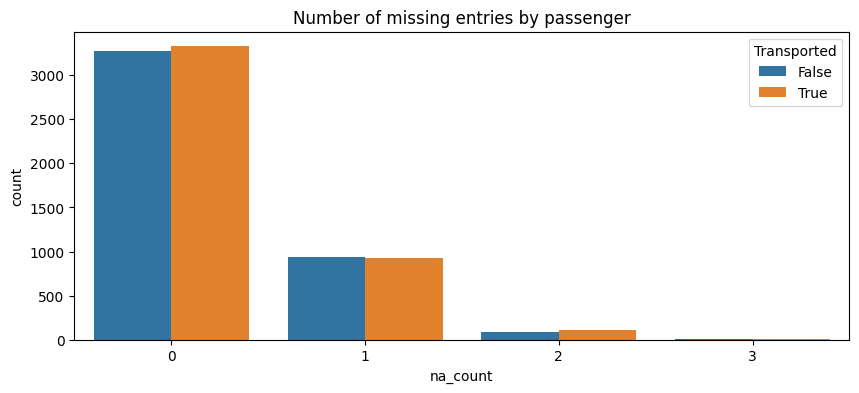

In [185]:
# Создание нового признака (колонки) `na_count`, который подсчитывает количество пропущенных значений (NaN) в каждой строке.
# `data.isna()` проверяет, какие элементы являются NaN (возвращает DataFrame из True/False),
# `sum(axis=1)` суммирует True (пропущенные значения) по строкам, подсчитывая количество NaN в каждой строке.
data['na_count'] = data.isna().sum(axis=1)

# Создание новой фигуры для построения графика, задаем размер графика 10x4.
plt.figure(figsize=(10, 4))

# Визуализация распределения количества пропущенных значений по пассажирам.
# Используется график `countplot` из библиотеки Seaborn (`sns`),
# где `x='na_count'` отображает количество пропущенных значений на оси X,
# а `hue='Transported'` означает, что пропущенные значения разделяются по целевой переменной `Transported`
# (например, разные цвета для "перемещенных" и "не перемещенных").
sns.countplot(data=data, x='na_count', hue='Transported')

# Добавляем заголовок графика для лучшего понимания отображаемой информации.
plt.title('Number of missing entries by passenger')

# Удаляем временно созданный столбец `na_count` из DataFrame, чтобы он не оставался в данных после визуализации.
# `axis=1` указывает, что мы удаляем колонку (столбец, а не строку).
# `inplace=True` означает, что изменения вносятся в сам объект `data`, а не возвращается новая копия.
data.drop('na_count', axis=1, inplace=True)

1. Пропущенные значения не зависят от цели и встречаются разрозненно:
   - Пропущенные данные не связаны с основным результатом (например, с тем, был ли пассажир транспортирован). Они появляются случайно в разных местах таблицы, а не группами. Это говорит о том, что пропуски в данных не зависят от какого-то общепричинного фактора.

2. Хотя 2% значений в данных отсутствуют, это затрагивает многие записи:
   - На первый взгляд 2% кажется небольшой долей, но из-за того, что пропуски разбросаны по разным колонкам, каждый четвертый пассажир (25%) имеет хотя бы одно пустое значение в своих данных. Таким образом, эти пропуски могут влиять на общий анализ, несмотря на их небольшой объем.

3. Идентификатор пассажира всегда указан:
   - Поле "идентификатор пассажира" заполнено у каждого игрока без исключений (оно уникально для каждого пассажира). Это единственный столбец, в котором нет пропусков. У нас всегда есть информация о том, кому принадлежат эти данные.


Стратегия:  
 - Если мы просто удалим пассажиров с пропущенными данными, то потеряем 25% от всех данных — это большое количество. Вместо удаления лучше попытаться аккуратно заполнить пропуски подходящими значениями.

- Если пассажиры входят в группы (например, семья или друзья), можно восстановить недостающую информацию, опираясь на данные их спутников.
- Или, если определенные столбцы часто связаны друг с другом (например, тип каюты связан с классом билета), пропущенные данные можно восстановить на основе таких зависимостей.

Самый простой способ справиться с пропущенными значениями - просто использовать медиану для непрерывных объектов и моду для категориальных объектов. Это будет работать "достаточно хорошо", но если мы хотим максимизировать точность наших моделей, нам нужно искать закономерности в недостающих данных. Чтобы сделать это, нужно посмотреть на общее распределение признаков, например, являются ли пассажиры из одной группы, как правило, членами одной семьи? Очевидно, что существует множество комбинаций, поэтому мы просто обобщим полезные тенденции, которые обнаружили.

Заполняем медианой (для непрерывных данных)

`?` Подумайте почему в качестве константы мы выбрали медиану

In [51]:
data_copy = data.copy()
data_copy['Age'] = data_copy['Age'].fillna(data['Age'].median())

In [52]:
data_copy['Age'].isna().sum()

np.int64(0)

Посмотрим на распределение признака после заполнения медианами.

Text(0.5, 0, 'Age')

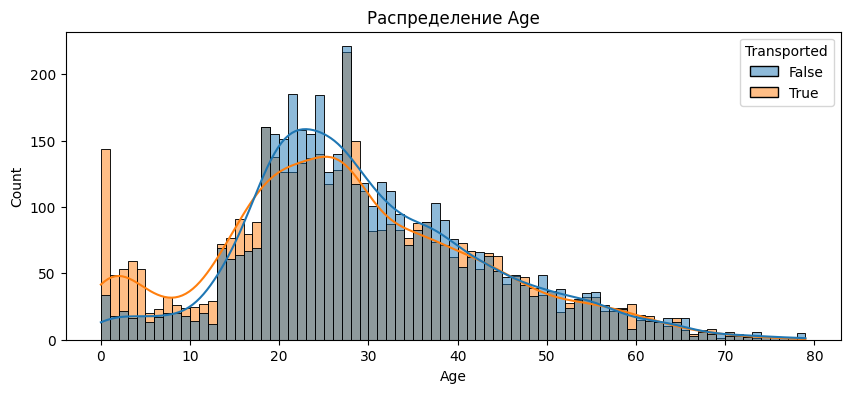

In [188]:
# Размер графика
plt.figure(figsize=(10,4))

sns.histplot(data=data_copy, x='Age', hue='Transported', binwidth=1, kde=True)

plt.title('Распределение Age')
plt.xlabel('Age')

Распределение изменилось незначительно, поэтому, оставляем эту стратегию

`!` Медиана не зависит от выбросов

Извлечем информацию о группе пассажиров и их размере из данных о пассажирах.

In [56]:
data['Group']

0          1
1          2
2          3
3          3
4          4
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: Group, Length: 8693, dtype: int64

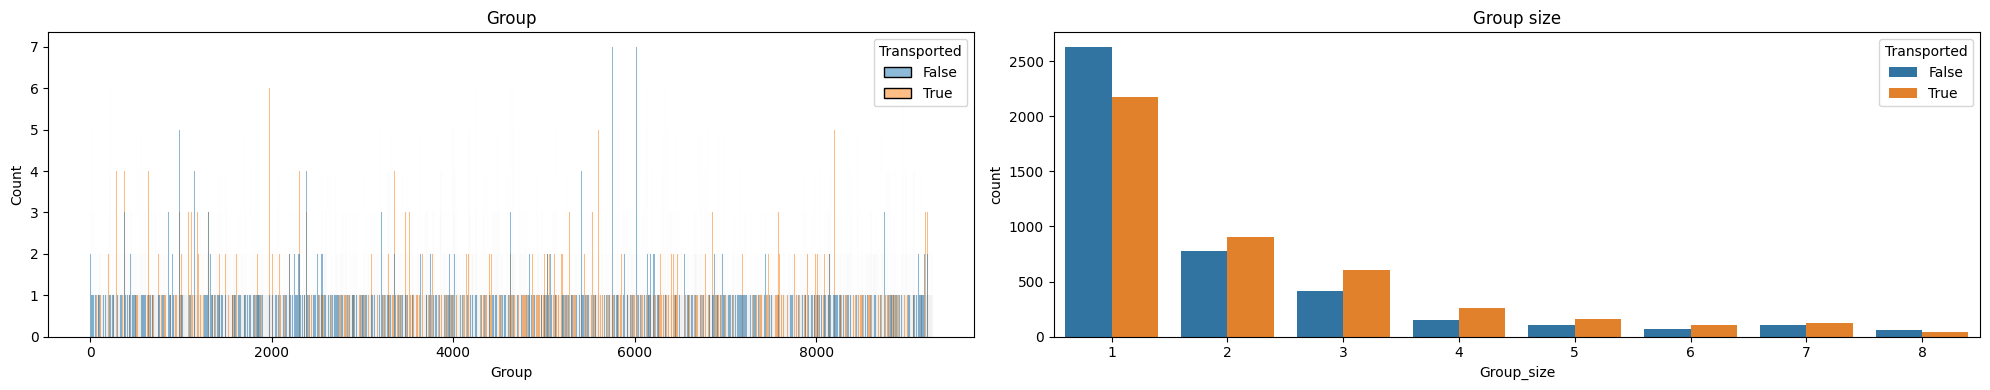

In [55]:
# Создание нового признака - Group
# Группа определяется по первой части PassengerId до символа "_"
data['Group'] = data['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# Оптимизация подсчёта размера группы
# Создаём Series с частотами, затем применяем map
group_sizes = data['Group'].value_counts()  # Подсчёт количества пассажиров в каждой группе
data['Group_size'] = data['Group'].map(group_sizes)  # Записываем размер группы для каждого пассажира

# Визуализация новых признаков
plt.figure(figsize=(20, 4))  # Общий размер рисунка

# 1. Распределение признака Group
plt.subplot(1, 2, 1)  # Первый график (в 1 строке, 2 столбца)
sns.histplot(data=data, x='Group', hue='Transported', binwidth=1)
plt.title('Group')  # Заголовок графика

# 2. Распределение признака Group_size
plt.subplot(1, 2, 2)  # Второй график
sns.countplot(data=data, x='Group_size', hue='Transported')
plt.title('Group size')  # Заголовок графика

# Сжатие расположения графиков для читабельности
plt.tight_layout()

# Показать визуализацию
plt.show()


Анализ показывает, что пассажиры, которые путешествуют в одиночку (`Group_size = 1`), менее склонны быть транспортированы (переменная `Transported` имеет более низкую вероятность равняться `True`), по сравнению с теми, кто путешествует в группе (`Group_size > 1`).

(0.0, 3000.0)

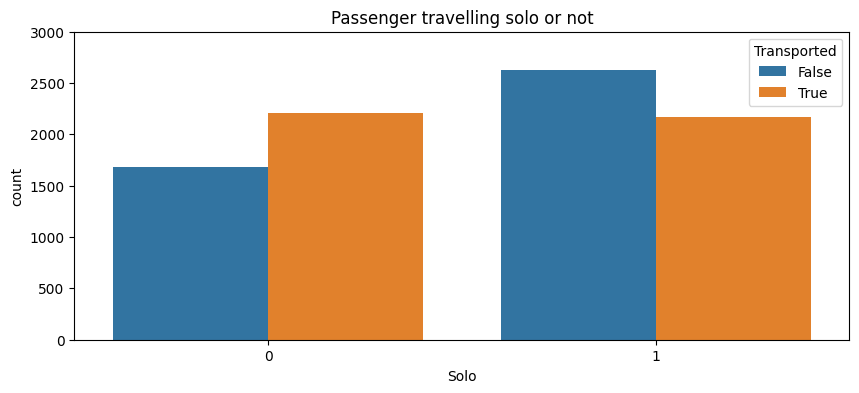

In [190]:
# Новый признак 'Solo': определяем, путешествует ли пассажир в одиночку
# Если 'Group_size' равен 1, значит пассажир путешествует в одиночку ('Solo' = 1), иначе — в группе ('Solo' = 0)
# Преобразуем результат логической проверки (True/False) в числовой формат (1/0) с помощью .astype(int)
data['Solo'] = (data['Group_size'] == 1).astype(int)

# Визуализация распределения нового признака 'Solo'
plt.figure(figsize=(10, 4))  # Устанавливаем размер графика

# Строим график countplot, чтобы показать, сколько пассажиров путешествует в одиночку ('Solo' = 1)
# и сколько в группе ('Solo' = 0) с разделением по целевому признаку 'Transported' (перемещены или нет)
sns.countplot(data=data, x='Solo', hue='Transported')

# Добавляем заголовок к графику
plt.title('Passenger travelling solo or not')

# Устанавливаем лимиты оси Y (высота столбиков), чтобы график был удобным для восприятия и имел фиксированные границы
plt.ylim([0, 3000])

Признак `HomePlanet`

In [191]:
# Группировка по признакам 'Group' и 'HomePlanet' с целью анализа их совместного распределения
# data.groupby(['Group', 'HomePlanet']) создает группировку по уникальным комбинациям значений признаков 'Group' и 'HomePlanet'.
# ['HomePlanet'] извлекает текущую колонку для выполнения некоторых операций.

# .size() подсчитывает количество строк (пассажиров), относящихся к каждой комбинации пары ('Group', 'HomePlanet').
# .unstack() преобразует результаты группировки в табличный (матрицированный) вид:
# - Индексами (строками) становятся уникальные значения 'Group'.
# - Столбцами становятся уникальные значения 'HomePlanet'.

# .fillna(0) заменяет все значения NaN (отсутствующие данные) в полученной таблице на 0,
# что означает, что для данной комбинации ('Group', 'HomePlanet') нет пассажиров.
GHP_gb = data.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Просматриваем первые 5 строк сформированной таблицы для проверки результата
# head() выводит первые строки полученного DataFrame, чтобы можно было убедиться в правильности группировки и трансформации.
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0


Text(0.5, 1.0, 'Number of unique home planets per group')

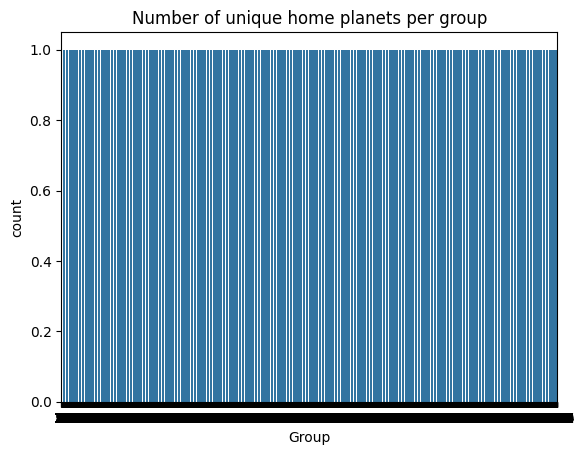

In [192]:
# Считаем количество уникальных родных планет (HomePlanets), связанных с каждой группой (Group).
# GHP_gb — таблица с количеством пассажиров для каждой комбинации Group и HomePlanet.
# (GHP_gb > 0): переводим данные в булевую форму, где значение True — есть пассажиры для этой планеты в группе.
# .sum(axis=1): для каждой группы подсчитываем количество True (т.е. количество уникальных планет, связанных с группой).
sns.countplot((GHP_gb > 0).sum(axis=1))

# Добавляем заголовок графика, объясняющий, что визуализируется распределение количества уникальных планет в группах.
plt.title('Number of unique home planets per group')

Отлично! Это показывает, что все участники одной и той же группы (`Group`) прибывают с одной и той же родной планеты (`HomePlanet`). Поэтому мы можем заполнять пропущенные значения в столбце `HomePlanet` на основе группы. (По крайней мере для тех случаев, где размер группы больше 1.)

In [193]:
# Считаем пропущенные значения до начала обработки
HP_bef = data['HomePlanet'].isna().sum()

# Определяем индексы пассажиров с неизвестным 'HomePlanet', но находящихся в группах с известным 'HomePlanet'
missing_hp = data['HomePlanet'].isna()  # Логический фильтр для строк с пропущенными значениями
group_with_known_hp = data['Group'].isin(GHP_gb.index)  # Группы, для которых известен их 'HomePlanet'
GHP_index = data[missing_hp & group_with_known_hp].index  # Получаем индексы таких пассажиров

# Заполнение пропущенных значений для найденных выше индексов
data.loc[GHP_index, 'HomePlanet'] = data.loc[GHP_index, 'Group'].map(
    lambda group: GHP_gb.idxmax(axis=1)[group]  # Находим наиболее частое значение 'HomePlanet' для каждой группы
)

# Выводим количество пропущенных значений до и после обработки
print('#HomePlanet missing values before:', HP_bef)
print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 201
#HomePlanet missing values after: 111


Заполнили 90 записей

Расположение кабины  
Извлечь информацию о палубе, номере и стороне из признака (столбца) "cabin".

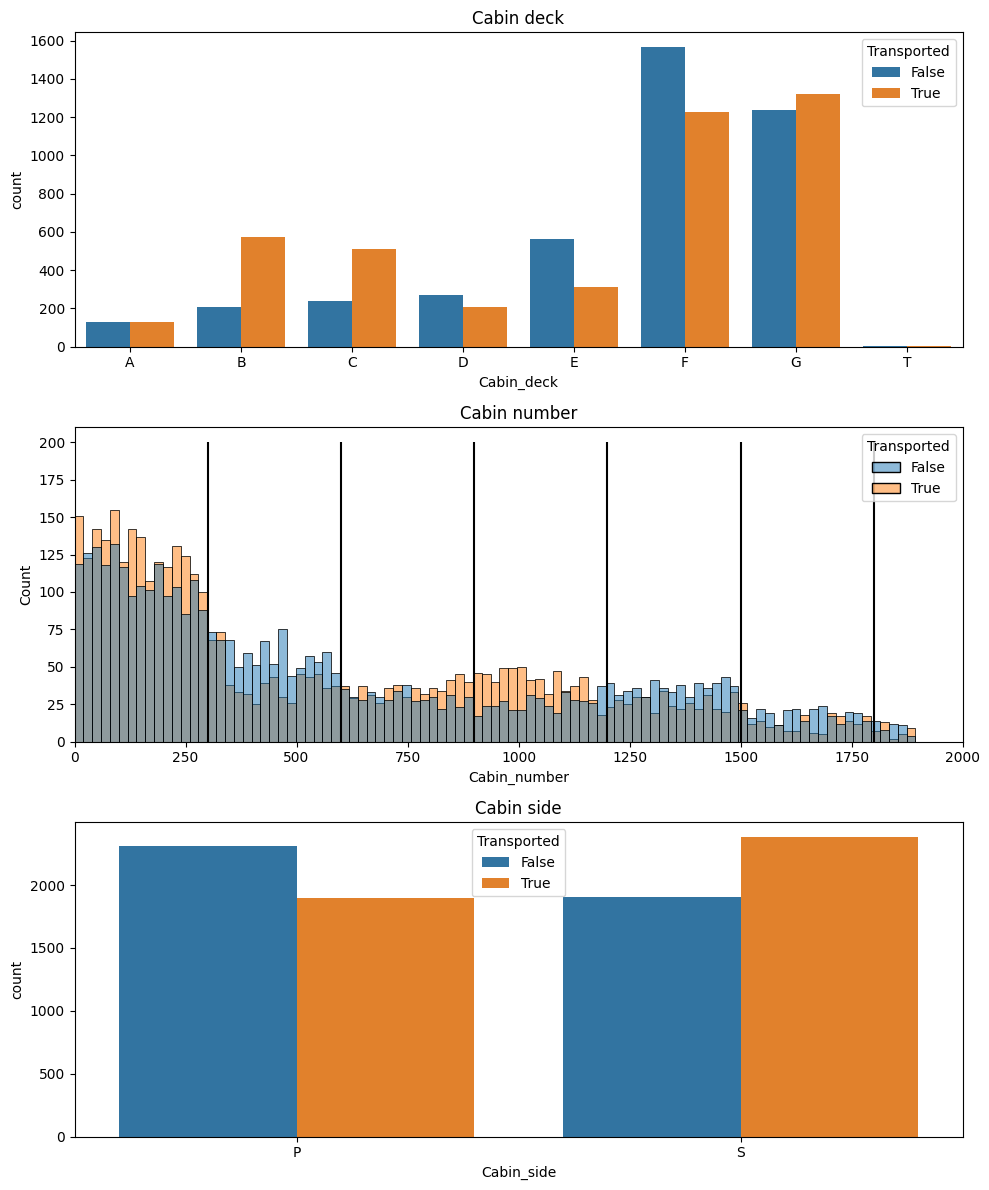

In [194]:
# Заменяем пропущенные значения NaN в столбце 'Cabin' на фиктивные значения 'Z/9999/Z',
# чтобы позже мы смогли разделить этот признак (и временно избавиться от NaN).
data['Cabin'] = data['Cabin'].fillna('Z/9999/Z')

# Извлекаем новые признаки из столбца 'Cabin'

# 'Cabin_deck': Извлекаем значение палубы (Deck), которое находится до первого "/".
data['Cabin_deck'] = data['Cabin'].apply(lambda x: x.split('/')[0])

# 'Cabin_number': Извлекаем номер каюты, который находится между первыми и вторыми "/".
# Преобразуем его в числовой тип данных (int).
data['Cabin_number'] = data['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)

# 'Cabin_side': Извлекаем сторону каюты (Side), которая идет после второго "/".
data['Cabin_side'] = data['Cabin'].apply(lambda x: x.split('/')[2])

# Восстанавливаем пропущенные значения NaN для извлеченных признаков
# Если палуба = 'Z' (то есть временное значение, добавленное ранее), заменяем на NaN.
data.loc[data['Cabin_deck']=='Z', 'Cabin_deck']=np.nan

# Если номер каюты = 9999 (временное значение), заменяем на NaN.
data.loc[data['Cabin_number']==9999, 'Cabin_number']=np.nan

# Если сторона = 'Z', заменяем на NaN.
data.loc[data['Cabin_side']=='Z', 'Cabin_side']=np.nan

# Удаляем столбец 'Cabin', так как он больше не нужен
# (вся информация из него уже разбита на отдельные признаки).
data.drop('Cabin', axis=1, inplace=True)

# Построение графиков распределения для новых признаков
fig=plt.figure(figsize=(10,12))  # Устанавливаем размер графика: ширина 10, высота 12.

# Подграфик 1: График количества пассажиров на каждой палубе ('Cabin_deck')
plt.subplot(3,1,1)  # Первое из трех подграфиков
sns.countplot(data=data, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])  # Сортируем палубы в заданном порядке
plt.title('Cabin deck')  # Заголовок подграфика: "Палуба каюты"

# Подграфик 2: Гистограмма распределения номеров кают ('Cabin_number')
plt.subplot(3,1,2)  # Второе из трех подграфиков
sns.histplot(data=data, x='Cabin_number', hue='Transported', binwidth=20)  # Гистограмма, где каждое значение сгруппировано каждые 20
plt.vlines(300, ymin=0, ymax=200, color='black')  # Вертикальные линии для просмотра сегментации номеров кают
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')  # Заголовок подграфика: "Номер каюты"
plt.xlim([0,2000])  # Устанавливаем пределы оси X от 0 до 2000

# Подграфик 3: График количества пассажиров по сторонам кают ('Cabin_side')
plt.subplot(3,1,3)  # Третье из трех подграфиков
sns.countplot(data=data, x='Cabin_side', hue='Transported')  # График с количеством людей с каждой стороны (лево/право)
plt.title('Cabin side')  # Заголовок подграфика: "Сторона каюты"

# Автоматически регулируем расположение графиков (чтобы они не перекрывали друг друга)
fig.tight_layout()

Интересные находки:
1. Номера кают (`Cabin_number`) разделены по группам каждые 300 номеров (0-300, 301-600 и т.д.). Это позволяет преобразовать этот признак в категориальный, где каждая категория будет указывать на "группу кают", в которой находится пассажир.

2. Палуба 'T' (`Cabin_deck`) представлена лишь у 5 пассажиров. Это считается выбросом, так как значение встречается крайне редко. С такими данными можно поступить по-разному: либо объединить 'T' с другой палубой (например, со случайной), либо обозначить как "Прочее", либо исключить этих пассажиров из анализа.

`HomePlanet` и `Destination`

<Axes: xlabel='HomePlanet', ylabel='Destination'>

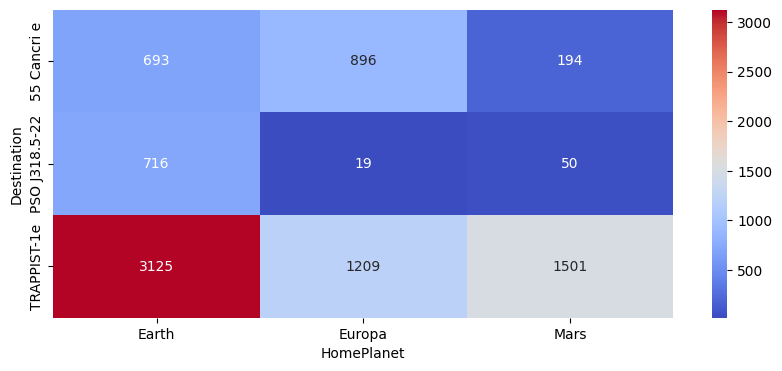

In [195]:
# Создаем новую таблицу, где вычисляем совместное распределение пассажиров по их "домашней планете" (HomePlanet)
# и пункту назначения (Destination).
# Используем groupby для группировки данных по HomePlanet и Destination,
# а затем применяем размерность (size()), чтобы подсчитать количество записей для каждой комбинации.
# Метод unstack преобразует сгруппированный объект в таблицу, чтобы строки и столбцы соответствовали значениям HomePlanet и Destination.
# fillna(0) заменяет пустые значения (в местах, где нет данных) на 0.
HPD_gb = data.groupby(['HomePlanet', 'Destination'])['Destination'].size().unstack().fillna(0)

# Указываем размер будущего графика (ширина 10, высота 4) для улучшения визуализации.
plt.figure(figsize=(10, 4))

# Построение тепловой карты (heatmap), чтобы визуализировать распределение HomePlanet и Destination.
# HPD_gb.T - транспонируем таблицу, чтобы оси поменялись местами: HomePlanet на оси x, Destination на оси y.
# annot=True - аннотирует каждую ячейку тепловой карты соответствующим значением (количество пассажиров).
# fmt='g' - форматирует данные в их исходной форме (без экспоненциального представления или дробей).
# cmap='coolwarm' - цветовая карта для отображения тепловой карты, где "теплые" и "холодные" тона характеризуют разные значения.
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

In [196]:
# Подсчитываем количество пропущенных значений в столбце 'HomePlanet' до заполнения.
# Используем метод isna(), который возвращает True для пропущенных данных, и sum(), чтобы подсчитать общее число таких случаев.
HP_bef = data['HomePlanet'].isna().sum()

# Заполняем оставшиеся пропуски в столбце 'HomePlanet' с учетом информации о палубе ('Cabin_deck').

# Если значение в 'HomePlanet' пустое (isna()==True) и пассажир НЕ находится на палубе 'D' (~(data['Cabin_deck']=='D')),
# то заполняем значение как 'Earth'.
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck'] == 'D'), 'HomePlanet'] = 'Earth'

# Если значение в 'HomePlanet' пустое (isna()==True) и пассажир находится на палубе 'D' (data['Cabin_deck']=='D'),
# то заполняем значение как 'Mars'.
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'] == 'D'), 'HomePlanet'] = 'Mars'

# Print number of missing values left
# Выводим количество пропущенных значений до и после заполнения данных, чтобы проверить остаток пропусков.
# Контрольный вывод позволяет проверить, успешно ли мы обработали пропущенные значения в 'HomePlanet'.
print('#HomePlanet missing values before:', HP_bef)
print('#HomePlanet missing values after:', data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 111
#HomePlanet missing values after: 0


Пропущенные значения в признаке полностью заполнены

`Destination`




Поскольку большинство пассажиров (68%) направляются к пункту назначения TRAPPIST-1e, мы просто заполним отсутствующие значения этим значением (т.е. модой — наиболее часто встречающимся значением). На данном этапе не удалось найти более подходящего правила для заполнения пропусков.

In [197]:
# Подсчитываем количество пропущенных значений в столбце 'Destination' до заполнения.
# Для этого используем метод isna(), чтобы найти пропуски, и sum(), чтобы посчитать их количество.
D_bef = data['Destination'].isna().sum()

# Заполняем пропущенные значения в столбце 'Destination' значением 'TRAPPIST-1e'.
# 'TRAPPIST-1e' выбрано потому, что это наиболее часто встречающееся значение (мода), которое составляет 68% от общего числа значений.
# Это упрощённая стратегия заполнения на основе предварительного анализа данных (EDA).
data.loc[(data['Destination'].isna()), 'Destination'] = 'TRAPPIST-1e'

# Выводим количество пропущенных значений до и после заполнения, чтобы проверить успешность выполнения операции.
# Этот шаг помогает убедиться, что все пропуски были обработаны.
print('#Destination missing values before:', D_bef)
print('#Destination missing values after:', data['Destination'].isna().sum())

#Destination missing values before: 182
#Destination missing values after: 0


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  Group         8693 non-null   int64  
 14  Group_size    8693 non-null   int64  
 15  Solo          8693 non-null   int64  
 16  Cabin_deck    8494 non-null   object 
 17  Cabin_number  8494 non-null   float64
 18  Cabin_side    8494 non-null 

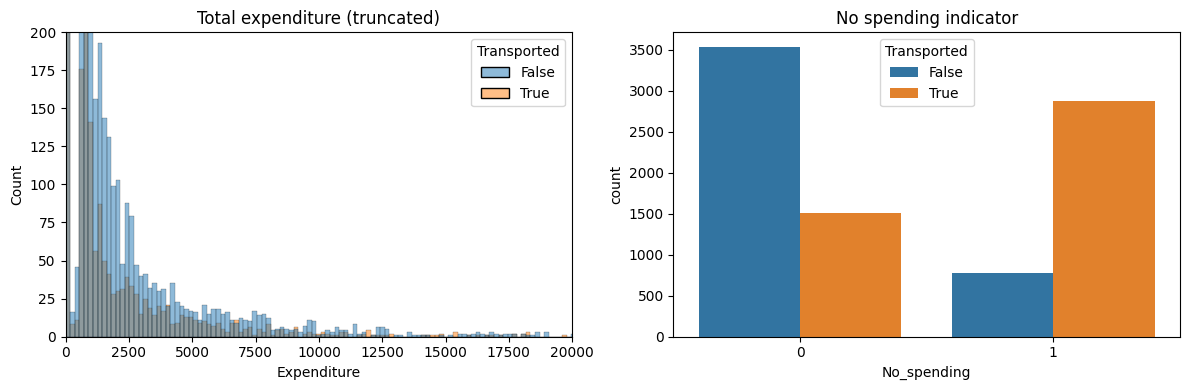

In [199]:
# Рассчитываем общую сумму затрат (Expenditure) для общего набора данных (data), суммируя значения в exp_feats (предположительно это столбцы, такие как ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']).
data['Expenditure'] = data[exp_feats].sum(axis=1)

# Создаём бинарный признак 'No_spending', который равен 1, если у пассажира отсутствуют затраты (Expenditure == 0), иначе 0.
# .astype(int) позволяет преобразовать булевое значение (True/False) в целое (1/0).
data['No_spending'] = (data['Expenditure'] == 0).astype(int)


# Начинаем построение двух графиков для анализа новых признаков.
# Создаём холст для размещения двух графиков, задав его размер (ширина 12, высота 4).
fig = plt.figure(figsize=(12, 4))


# Первый график (левая часть холста) для отображения распределения расходов (Expenditure).
plt.subplot(1, 2, 1)  # Задаём, что это первый график на холсте из двух (1 строка, 2 столбца, первый график).
sns.histplot(data=data, x='Expenditure', hue='Transported', bins=200)
# Строим гистограмму. x='Expenditure' показывает распределение общей суммы расходов.
# hue='Transported' разделяет данные по категориям транспортированных ('Transported') и нет.
# bins=200 означает, что значения распределены по 200 корзинам, чтобы показать более детальное распределение.

plt.title('Total expenditure (truncated)')  # Заголовок графика: "Общие расходы (усечённые)"
plt.ylim([0, 200])  # Ограничиваем ось Y: максимум 200 пассажиров, чтобы сфокусироваться на плотности.
plt.xlim([0, 20000])  # Ось X (значения расходов) ограничена диапазоном от 0 до 20,000.

# Второй график (правая часть холста) показывает, сколько пассажиров с/без расходов и как это связано с 'Transported'.
plt.subplot(1, 2, 2)  # Указываем, что второй график также будет являться частью холста с двумя графиками.
sns.countplot(data=data, x='No_spending', hue='Transported')
# Используем countplot для отображения количества пассажиров с бинарным признаком 'No_spending' (1 или 0), разделённым по категории 'Transported'.

plt.title('No spending indicator')  # Заголовок графика: "Индикатор отсутствия расходов"

# Корректируем расстояния и выравнивание элементов, чтобы оба графика выглядели аккуратно и не пересекались.
fig.tight_layout()

Давайте рассмотрим еще один вариант обработки `Age`

Возраст пассажиров (`Age`) может различаться в зависимости от различных характеристик, таких как `HomePlanet` (родная планета), размер группы пассажиров (`group size`), их расходы (`expenditure`), а также палуба каюты (`cabin deck`). Поэтому, чтобы заполнить пропущенные значения в возрасте, мы заменим их на медиану соответствующих подгрупп. Это позволит учесть возможные закономерности в данных и скорректировать заполнение недостающих значений с учетом контекста

In [200]:
# Группируем данные по нескольким категориям: HomePlanet, No_spending, Solo, Cabin_deck
# Группировка позволяет создать подгруппы на основе комбинации этих признаков для дальнейшего анализа.
# HomePlanet: родная планета пассажира.
# No_spending: бинарный признак (1 - отсутствуют расходы, 0 - есть расходы).
# Solo: бинарный признак, обозначающий, путешествует ли пассажир в одиночку (1) или в группе (0).
# Cabin_deck: признак, отражающий палубу, на которой расположен номер каюты пассажира.

data.groupby(['HomePlanet', 'No_spending', 'Solo', 'Cabin_deck'])['Age'].median().unstack().fillna(0)
# Для каждой полученной подгруппы (сочетания значений HomePlanet, No_spending, Solo и Cabin_deck) рассчитывается медианный возраст ("Age").
# Использование медианы предпочтительно для работы с выбросами или неравномерными распределениями в данных.
# После группировки, метод unstack "разворачивает" один из уровней вложенности (в данном случае, последний уровень группировки, скорее всего Cabin_deck),
# преобразуя данные из формата Series в табличный вид DataFrame, где один из признаков становится столбцами.
# Заполняем отсутствующие значения (NaN), которые могли возникнуть из-за отсутствия пассажиров в некоторых комбинациях подгрупп, значением 0.
# Это делается для предотвращения ошибок при дальнейшей обработке данных.
# В результате получится таблица, где по строкам идут комбинации значений HomePlanet, No_spending, и Solo,
# а по столбцам — значения Cabin_deck, с заполненной медианой возраста для каждой подгруппы.

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  26.0  29.0   0.0
                       1      0.0   0.0  22.5   0.0  26.0  24.0  27.0  35.0
           1           0      0.0   0.0   0.0   0.0   7.0  15.0   8.0   0.0
                       1     38.0  38.0  42.5   0.0  20.0  35.0  23.0   0.0
Europa     0           0     36.0  34.0  33.0  32.5  32.0   0.0   0.0   0.0
                       1     34.0  37.0  36.0  34.5  34.5   0.0   0.0  37.5
           1           0     29.0  27.0  29.0  30.0  26.0   0.0   0.0   0.0
                       1     31.0  33.5  33.0  31.0  33.5   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  31.0  29.0  28.5   0.0   0.0
                       1      0.0   0.0   0.0  30.0  29.0  32.0   0.0   0.0
           1           0      0.0   0.0   0.0  35.0  26.0  17.0   0.0   0.0
                       1      0.0   0.0   0.0  32.0  30.0  30.0   0.0   0.0

In [201]:
A_bef = data[exp_feats].isna().sum().sum()
# Считаем общее количество пропущенных значений перед обработкой.
# Здесь `exp_feats` скорее всего — список признаков/столбцов, среди которых проводится проверка на пропуски.
# Команда `isna()` определяет, где есть пропуски, `sum()` подсчитывает их количество по каждой колонке,
# а итоговый `.sum()` суммирует все пропуски по всем выбранным признакам.

na_rows_A = data.loc[data['Age'].isna(), 'Age'].index
# Получаем индексы строк, где в колонке 'Age' есть пропуски (NaN).
# Это важно, чтобы можно было точно заменить только эти пропущенные значения и не затронуть другие строки.

data.loc[data['Age'].isna(), 'Age'] = data.groupby(['HomePlanet', 'No_spending', 'Solo', 'Cabin_deck'])['Age']\
    .transform(lambda x: x.fillna(x.median()))[na_rows_A]
# Находим пропущенные значения возраста ('Age') и заменяем их медианой внутри соответствующих подгрупп.
# 1. `groupby` создает подгруппы на основе HomePlanet, No_spending, Solo и Cabin_deck.
# 2. `['Age']` указывает, что нас интересует именно колонка 'Age' для вычислений.
# 3. Используется `.transform()`, чтобы применить функцию заполнения медианой конкретно к соответствующим группам.
# 4. `lambda x: x.fillna(x.median())` — для каждой подгруппы производится вычисление медианы и заполнение пропусков медианным значением группы.
# 5. `[na_rows_A]` — индексация позволяет применить изменения только для строк с отсутствующими значениями возраста.

print('#Age missing values before:', A_bef)
# Выводим общее количество пропущенных значений 'Age' до обработки.

print('#Age missing values after:', data['Age'].isna().sum())
# Выводим количество пропущенных значений 'Age' после обработки. Это позволяет проверить, сколько пропусков осталось (если остались) после заполнения.

#Age missing values before: 943
#Age missing values after: 4


Да, у нас остались 4 пропущенных значения, но данное заполнение может помочь сохранить больше информации

In [202]:
# Группировка данных по двум колонкам: 'No_spending' и 'CryoSleep'
# Для каждой уникальной комбинации этих двух колонок подсчитывается количество записей
data.groupby(['No_spending', 'CryoSleep'])['CryoSleep'] \
    .size().unstack().fillna(0)  # Подсчитать количество элементов (размер) для каждой группы

# "Развернуть" группированные данные так, чтобы уникальные значения 'CryoSleep' стали столбцами.
# В результате создается сводная таблица, где строки — категории 'No_spending',
# а столбцы — категории 'CryoSleep' (например, True/False или другие).

# Заполнить пропущенные значения нулями. Это может случиться, если для комбинации 'No_spending'
# и 'CryoSleep' отсутствуют записи. Например, если у группы 'No_spending=A' нет 'CryoSleep=False',
# то значение будет NaN, которое заменяется на 0.

CryoSleep,False,True
No_spending,,
0,4921.0,0.0
1,518.0,3037.0


In [203]:
# Подсчитываем число пропущенных значений в колонке 'CryoSleep' перед их обработкой
CSL_bef = data['CryoSleep'].isna().sum()

# Определяем индексы всех строк, где значения 'CryoSleep' являются пропущенными
na_rows_CSL = data.loc[data['CryoSleep'].isna(), 'CryoSleep'].index

# Заполняем пропущенные значения в 'CryoSleep' модальными значениями (значением, которое встречается чаще всего)
# внутри каждой группы 'No_spending'. Используем transform, чтобы обработать группы.
# Примечание: Для избежания предупреждений используем метод fillna вне transform.
mode_values = data.groupby('No_spending')['CryoSleep'].transform(lambda x: pd.Series.mode(x)[0])  # Находим модальное значение для каждой группы
data.loc[na_rows_CSL, 'CryoSleep'] = mode_values[na_rows_CSL]  # Заполняем только строки с пропущенными значениями.

# Подсчитываем и выводим число оставшихся пропущенных значений в колонке 'CryoSleep'
print('#CryoSleep missing values before:', CSL_bef)  # Выводим количество пропущенных значений до обработки
print('#CryoSleep missing values after:', data['CryoSleep'].isna().sum())  # После

#CryoSleep missing values before: 217
#CryoSleep missing values after: 0


In [204]:
# собираем данные с пропущенными значениями
na_cols=data.columns[data.isna().any()].tolist()

# сформируем таблицу с процентным соотношением пропущенных значений
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
Age,4,0.05
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16
Name,200,2.30
Cabin_deck,199,2.29
Cabin_number,199,2.29


Мы видим, что не все пропущенные значения очищены, предлагается поэкспериментировать и попрактиковаться самостоятельно